In [1]:
import numpy as np
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, LeakyReLU
from tensorflow.keras.layers import Conv2D, BatchNormalization, LocallyConnected2D, SeparableConv2D
import tensorflow.keras.optimizers as optimizers
from tensorflow.keras.constraints import max_norm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import activations
from create_data_victory import History, create_all_x_y

# Data creation

In [2]:
x, y = create_all_x_y()
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")

248 parties rejetées, reste 41563.0
x shape: (332504, 9, 9, 11)
y shape: (332504,)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(299253, 9, 9, 11)
(299253,)
(33251, 9, 9, 11)
(33251,)


# Model

In [8]:
model = Sequential()
for _ in range(6):
    model.add(Conv2D(64, kernel_size=(3,3), input_shape=x[0].shape, padding ="same", data_format="channels_last"))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_absolute_error', optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 9, 9, 64)          6400      
_________________________________________________________________
batch_normalization_9 (Batch (None, 9, 9, 64)          256       
_________________________________________________________________
activation_9 (Activation)    (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
batch_normalization_10 (Batc (None, 9, 9, 64)          256       
_________________________________________________________________
activation_10 (Activation)   (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 64)         

# Training

In [9]:
history=[History()]
# hyperparamètres
epochs = 50
batch_size = 2000
# training
print("Training ...")
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),
          callbacks=history)

Training ...
Epoch 1/50
150/150 [==============================] - 44s 294ms/step - loss: 0.2752 - val_loss: 0.3204
Epoch 2/50
150/150 [==============================] - 47s 314ms/step - loss: 0.2474 - val_loss: 0.2867
Epoch 3/50
150/150 [==============================] - 61s 408ms/step - loss: 0.2419 - val_loss: 0.2519
Epoch 4/50
150/150 [==============================] - 61s 409ms/step - loss: 0.2363 - val_loss: 0.2363
Epoch 5/50
150/150 [==============================] - 61s 409ms/step - loss: 0.2271 - val_loss: 0.2260
Epoch 6/50
150/150 [==============================] - 61s 408ms/step - loss: 0.2124 - val_loss: 0.2034
Epoch 7/50
150/150 [==============================] - 61s 409ms/step - loss: 0.1909 - val_loss: 0.1852
Epoch 8/50
150/150 [==============================] - 61s 409ms/step - loss: 0.1729 - val_loss: 0.1613
Epoch 9/50
150/150 [==============================] - 61s 408ms/step - loss: 0.1618 - val_loss: 0.1546
Epoch 10/50
150/150 [==============================] - 61s 4

# Statistics

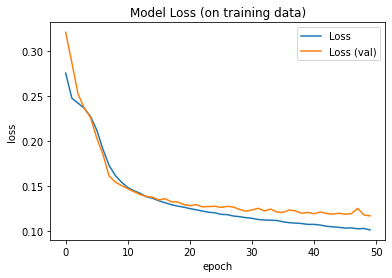

In [10]:
#Print model loss
plt.plot(history[0].history['loss'])
plt.plot(history[0].history['val_loss'])
plt.title('Model Loss (on training data)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Loss', 'Loss (val)'])
plt.show()

In [11]:
sample_size = 14
print(y_test[:sample_size])
print(np.round(model.predict(X_test[:sample_size]).reshape((sample_size,)), 2))

[0.65 1.   0.97 0.   0.   0.13 0.7  0.67 1.   1.   0.89 1.   1.   0.56]
[0.72 1.   0.83 0.   0.   0.69 0.58 0.6  0.65 1.   0.88 1.   1.   0.82]
